In [9]:
import pandas as pd

# Reload both as CSVs
team_revenue_df = pd.read_csv("NHL_Revenue_All_Teams_2020_2024_Final.csv")
city_revenue_df = pd.read_csv("NHL_City_Revenue_Impact_2020_2024.csv")

# Peek at the top few rows
print("\n🔍 Team Revenue Data Preview:")
print(team_revenue_df.head())
print("\nTeam Revenue Columns:", team_revenue_df.columns.tolist())

print("\n🔍 City Revenue Impact Data Preview:")
print(city_revenue_df.head())
print("\nCity Revenue Columns:", city_revenue_df.columns.tolist())



🔍 Team Revenue Data Preview:
   Year             Team Team Code  Base Revenue ($M)  Playoff Games  \
0  2020    Anaheim Ducks       ANA                189             12   
1  2020  Arizona Coyotes       ARI                196              8   
2  2020    Boston Bruins       BOS                193             10   
3  2020   Buffalo Sabres       BUF                205             10   
4  2020   Calgary Flames       CGY                177             12   

  Stanley Cup Win  Playoff Revenue ($M)  Total Revenue ($M)  
0              No                    24                 213  
1              No                    16                 212  
2              No                    20                 213  
3              No                    20                 225  
4              No                    24                 201  

Team Revenue Columns: ['Year', 'Team', 'Team Code', 'Base Revenue ($M)', 'Playoff Games', 'Stanley Cup Win', 'Playoff Revenue ($M)', 'Total Revenue ($M)']

🔍 City R

In [15]:
print("\nColumns in playoff_df:")
print(playoff_df.columns.tolist())

print("\nColumns in team_revenue_df:")
print(team_revenue_df.columns.tolist())



Columns in playoff_df:
['team', 'season', 'games_played', 'playoff_games', 'wins', 'losses', 'goals_for', 'goals_against', 'goal_diff', 'win_pct', 'elo', 'cup_winner']

Columns in team_revenue_df:
['Year', 'Team', 'Team Code', 'Base Revenue ($M)', 'Playoff Games', 'Stanley Cup Win', 'Playoff Revenue ($M)', 'Total Revenue ($M)']


In [17]:
# Rename columns in team revenue so they match playoff_df
team_revenue_df = team_revenue_df.rename(columns={
    "Team": "team",
    "Year": "season"
})


In [23]:
# Team Revenue Basic Info
print("\nTeam Revenue Dataset Shape:", team_revenue_df.shape)
print(team_revenue_df.dtypes)

# Quick basic stats
print("\n🔎 Team Revenue Summary Stats:")
print(team_revenue_df.describe())

# Check for missing values
print("\nMissing values in Team Revenue dataset:")
print(team_revenue_df.isnull().sum())



Team Revenue Dataset Shape: (160, 8)
season                   int64
team                    object
Team Code               object
Base Revenue ($M)        int64
Playoff Games            int64
Stanley Cup Win         object
Playoff Revenue ($M)     int64
Total Revenue ($M)       int64
dtype: object

🔎 Team Revenue Summary Stats:
            season  Base Revenue ($M)  Playoff Games  Playoff Revenue ($M)  \
count   160.000000         160.000000      160.00000            160.000000   
mean   2022.000000         200.493750        8.61250             17.381250   
std       1.418654          23.311669        5.93782             12.286861   
min    2020.000000         160.000000        0.00000              0.000000   
25%    2021.000000         181.000000        4.00000              8.000000   
50%    2022.000000         202.000000       10.00000             20.000000   
75%    2023.000000         218.000000       10.50000             21.000000   
max    2024.000000         240.000000       2

In [25]:
# City Revenue Basic Info
print("\nCity Revenue Dataset Shape:", city_revenue_df.shape)
print(city_revenue_df.dtypes)

# Quick basic stats
print("\n🔎 City Revenue Summary Stats:")
print(city_revenue_df.describe())

# Check for missing values
print("\nMissing values in City Revenue dataset:")
print(city_revenue_df.isnull().sum())



City Revenue Dataset Shape: (160, 7)
Year                         int64
City                        object
Team                        object
Base City Revenue ($B)     float64
Playoff Games                int64
Stanley Cup Win             object
Total City Revenue ($B)    float64
dtype: object

🔎 City Revenue Summary Stats:
              Year  Base City Revenue ($B)  Playoff Games  \
count   160.000000              160.000000     160.000000   
mean   2022.000000               17.565875       6.387500   
std       1.418654                7.419145       5.657952   
min    2020.000000                5.230000       0.000000   
25%    2021.000000               11.002500       4.000000   
50%    2022.000000               17.675000       6.000000   
75%    2023.000000               23.832500      10.000000   
max    2024.000000               29.990000      27.000000   

       Total City Revenue ($B)  
count               160.000000  
mean                 17.932125  
std                   7

In [27]:
# Correlation between Playoff Games and Total Team Revenue
team_corr = team_revenue_df["Playoff Games"].corr(team_revenue_df["Total Revenue ($M)"])
print(f"\n📈 Correlation between Team Playoff Games and Total Revenue: {team_corr:.2f}")



📈 Correlation between Team Playoff Games and Total Revenue: 0.47


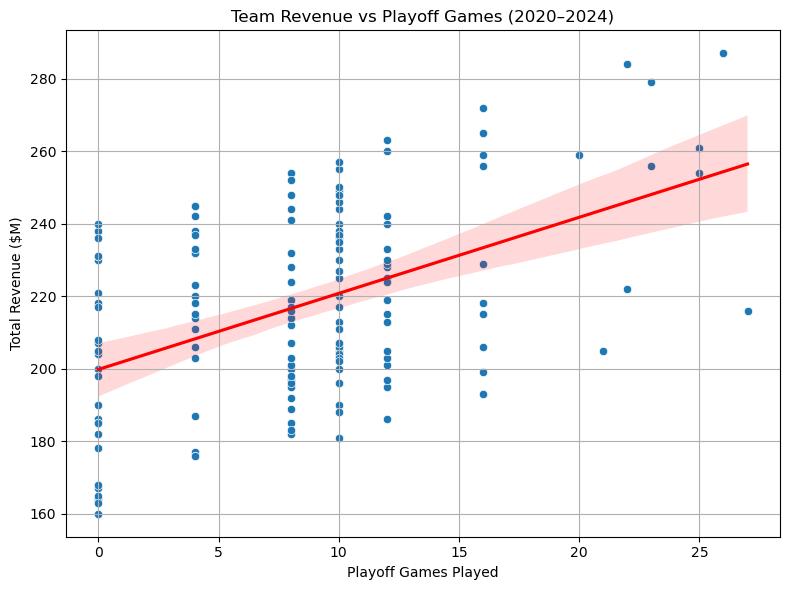

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=team_revenue_df,
    x="Playoff Games",
    y="Total Revenue ($M)"
)

# Add regression line
sns.regplot(
    data=team_revenue_df,
    x="Playoff Games",
    y="Total Revenue ($M)",
    scatter=False,
    color="red"
)

plt.title("Team Revenue vs Playoff Games (2020–2024)")
plt.xlabel("Playoff Games Played")
plt.ylabel("Total Revenue ($M)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Correlation between Playoff Games and Total City Revenue
city_corr = city_revenue_df["Playoff Games"].corr(city_revenue_df["Total City Revenue ($B)"])
print(f"\n📈 Correlation between City Playoff Games and Total City Revenue: {city_corr:.2f}")



📈 Correlation between City Playoff Games and Total City Revenue: 0.07


In [35]:
# 1. Load 2024–25 playoff predictions (the file you just showed)
predict_df = pd.read_csv("2024_2025_predictions_with_revenue_FINAL.csv")

# 3. Calculate slopes based on historical playoff/revenue relationships
team_slope = (team_revenue_df["Total Revenue ($M)"].max() - team_revenue_df["Total Revenue ($M)"].min()) / (team_revenue_df["Playoff Games"].max() - team_revenue_df["Playoff Games"].min())
city_slope = (city_revenue_df["Total City Revenue ($B)"].max() - city_revenue_df["Total City Revenue ($B)"].min()) / (city_revenue_df["Playoff Games"].max() - city_revenue_df["Playoff Games"].min())

# 4. Create financial projection columns
predict_df["predicted_team_revenue_increase_$M"] = predict_df["predicted_playoff_games"] * team_slope
predict_df["predicted_city_revenue_increase_$B"] = predict_df["predicted_playoff_games"] * city_slope

# 5. Save updated dataset
predict_df.to_csv("2024_2025_predictions_with_revenue_FINAL_v2.csv", index=False)

print("\n✅ 2024–25 Predictions + Revenue Projections Saved (v2)!")



✅ 2024–25 Predictions + Revenue Projections Saved (v2)!


In [37]:
predict_df.head()

,team,season,games_played,playoff_games,wins,losses,goals_for,goals_against,goal_diff,win_pct,elo,cup_winner,goal_efficiency,offensive_power,elo_x_win_pct,predicted_playoff_games,predicted_rank,predicted_team_revenue_increase_$M,predicted_city_revenue_increase_$B
0,TOR,2024-2025,85,3,55,30,280,237,43,0.647059,1632,NaN,0.781818,153,1056.000001,15.987236,1,75.199221,15.513540
1,WPG,2024-2025,85,3,58,27,286,202,84,0.682353,1621,NaN,1.448276,200,1106.094117,15.578738,2,73.277768,15.117146
2,LAK,2024-2025,85,3,50,35,266,220,46,0.588235,1583,NaN,0.920000,146,931.176470,11.332522,3,53.304827,10.996744
3,STL,2024-2025,85,3,45,40,265,242,23,0.529412,1562,NaN,0.511111,113,826.941177,9.363148,4,44.041474,9.085722
4,COL,2024-2025,85,3,50,35,286,241,45,0.588235,1559,NaN,0.900000,145,917.058823,9.229757,5,43.414040,8.956282


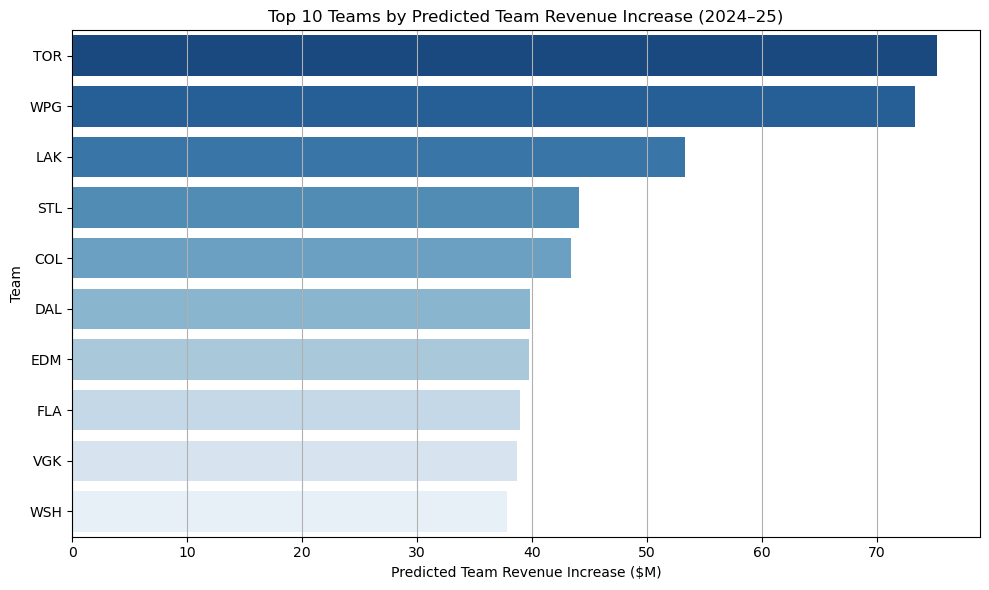

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select Top 10
top10_teams = predict_df.sort_values(by="predicted_team_revenue_increase_$M", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_teams,
    y="team",
    x="predicted_team_revenue_increase_$M",
    palette="Blues_r"
)

plt.title("Top 10 Teams by Predicted Team Revenue Increase (2024–25)")
plt.xlabel("Predicted Team Revenue Increase ($M)")
plt.ylabel("Team")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


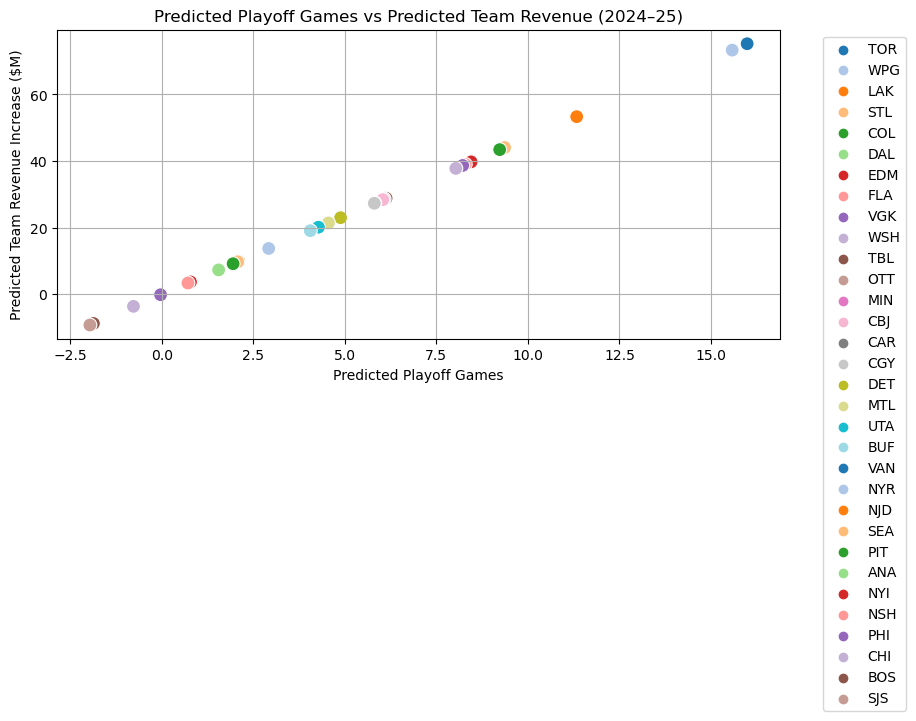

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=predict_df,
    x="predicted_playoff_games",
    y="predicted_team_revenue_increase_$M",
    hue="team",
    palette="tab20",
    s=100
)

plt.title("Predicted Playoff Games vs Predicted Team Revenue (2024–25)")
plt.xlabel("Predicted Playoff Games")
plt.ylabel("Predicted Team Revenue Increase ($M)")
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [59]:
# --- Non-Visual EDA for Predict + Revenue ---

print("\n Basic Statistics:")
print(predict_df[["predicted_playoff_games", "predicted_team_revenue_increase_$M", "predicted_city_revenue_increase_$B"]].describe())

print("\n Top Predicted Team by Revenue Increase:")
top_team = predict_df.loc[predict_df["predicted_team_revenue_increase_$M"].idxmax()]
print(top_team[["team", "predicted_team_revenue_increase_$M", "predicted_city_revenue_increase_$B"]])

print("\n Correlation between Playoff Games and Team Revenue:")
corr_playoff_teamrev = predict_df["predicted_playoff_games"].corr(predict_df["predicted_team_revenue_increase_$M"])
print(f"Correlation: {corr_playoff_teamrev:.2f}")

print("\n Correlation between Playoff Games and City Revenue:")
corr_playoff_cityrev = predict_df["predicted_playoff_games"].corr(predict_df["predicted_city_revenue_increase_$B"])
print(f"Correlation: {corr_playoff_cityrev:.2f}")

print("\n Number of Teams Predicted to Earn More Than $10M:")
print((predict_df["predicted_team_revenue_increase_$M"] > 10).sum())

print("\n Number of Teams Predicted to Boost City Revenue More Than $2B:")
print((predict_df["predicted_city_revenue_increase_$B"] > 2).sum())

print("\n Teams with 0 Predicted Playoff Games (Longshots):")
print(predict_df[predict_df["predicted_playoff_games"] == 0][["team", "predicted_playoff_games"]])



 Basic Statistics:
       predicted_playoff_games  predicted_team_revenue_increase_$M  \
count                32.000000                           32.000000   
mean                  5.218862                           24.547981   
std                   4.425058                           20.814164   
min                  -1.961837                           -9.227899   
25%                   2.041245                            9.601413   
50%                   5.345622                           25.144224   
75%                   8.236238                           38.740825   
max                  15.987236                           75.199221   

       predicted_city_revenue_increase_$B  
count                           32.000000  
mean                             5.064229  
std                              4.293946  
min                             -1.903708  
25%                              1.980764  
50%                              5.187234  
75%                              7.992202

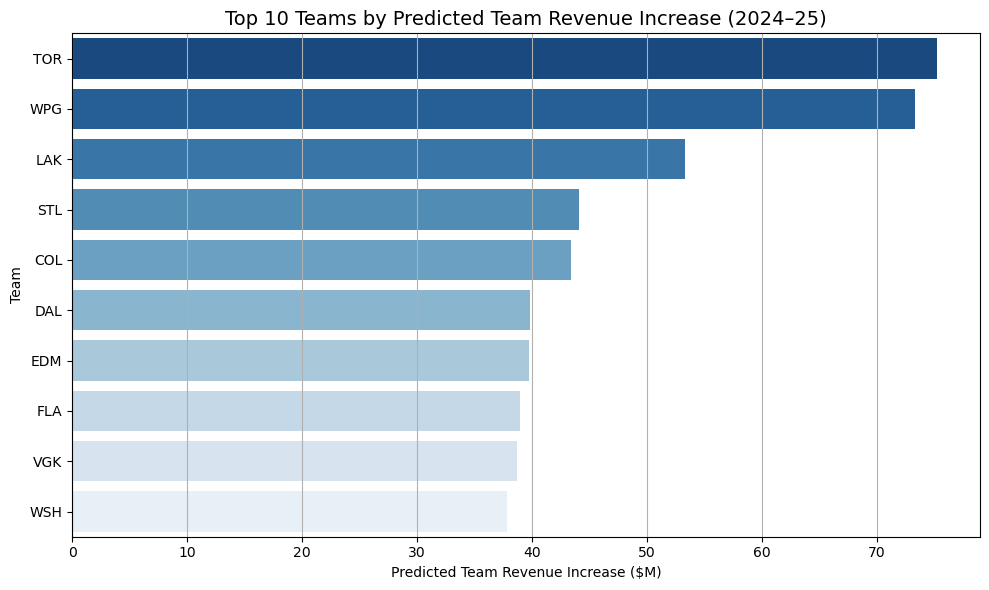

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select Top 10
top10_teams = predict_df.sort_values(by="predicted_team_revenue_increase_$M", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_teams,
    y="team",
    x="predicted_team_revenue_increase_$M",
    palette="Blues_r"
)

plt.title("Top 10 Teams by Predicted Team Revenue Increase (2024–25)", fontsize=14)
plt.xlabel("Predicted Team Revenue Increase ($M)")
plt.ylabel("Team")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


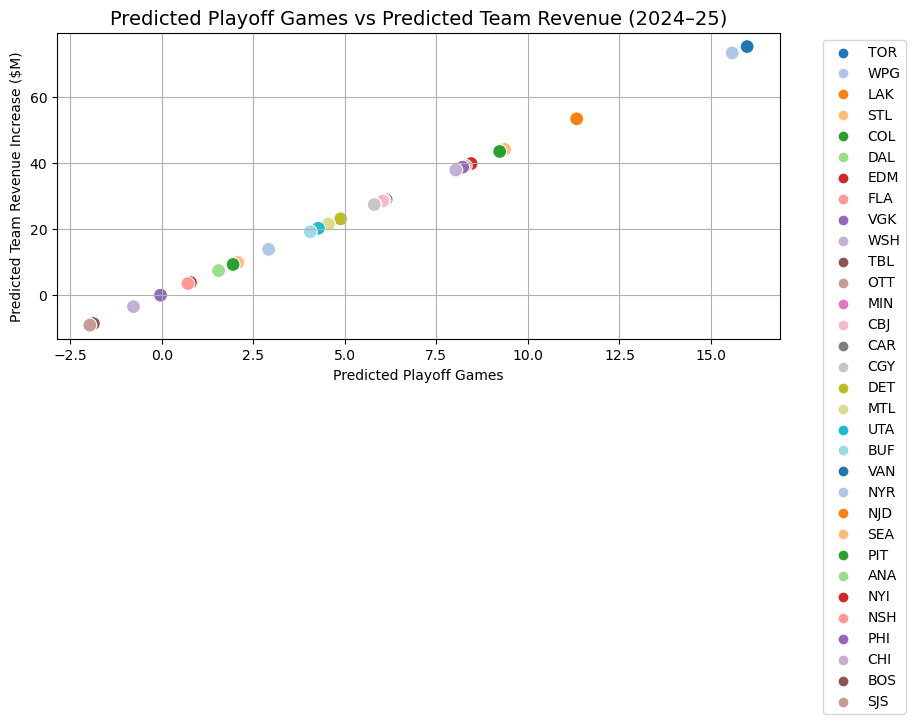

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=predict_df,
    x="predicted_playoff_games",
    y="predicted_team_revenue_increase_$M",
    hue="team",
    palette='tab20',
    s=100
)

plt.title("Predicted Playoff Games vs Predicted Team Revenue (2024–25)", fontsize=14)
plt.xlabel("Predicted Playoff Games")
plt.ylabel("Predicted Team Revenue Increase ($M)")
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [51]:
from scipy.stats import zscore

# Calculate Z-scores for Wins
predict_df['wins_zscore'] = zscore(predict_df['wins'])

# Calculate Z-scores for Elo
predict_df['elo_zscore'] = zscore(predict_df['elo'])

# Show top teams
print(predict_df[['team', 'wins', 'wins_zscore', 'elo', 'elo_zscore']].sort_values(by='wins_zscore', ascending=False))


   team  wins  wins_zscore   elo  elo_zscore
1   WPG    58     1.860536  1621    1.782547
0   TOR    55     1.517712  1632    1.944596
9   WSH    53     1.289162  1545    0.662931
5   DAL    52     1.174888  1550    0.736590
8   VGK    51     1.060613  1547    0.692394
4   COL    50     0.946338  1559    0.869176
2   LAK    50     0.946338  1583    1.222739
6   EDM    49     0.832063  1552    0.766053
7   FLA    49     0.832063  1550    0.736590
14  CAR    49     0.832063  1520    0.294636
10  TBL    47     0.603514  1521    0.309368
12  MIN    47     0.603514  1525    0.368295
3   STL    45     0.374964  1562    0.913371
11  OTT    45     0.374964  1523    0.338831
22  NJD    43     0.146415  1470   -0.441954
15  CGY    41    -0.082135  1521    0.309368
17  MTL    41    -0.082135  1501    0.014732
13  CBJ    40    -0.196410  1522    0.324099
21  NYR    39    -0.310685  1480   -0.294636
16  DET    39    -0.310685  1507    0.103123
20  VAN    38    -0.424959  1479   -0.309368
18  UTA   

In [61]:
from scipy.stats import zscore

# Calculate Z-scores for Wins and Elo
predict_df['wins_zscore'] = zscore(predict_df['wins'])
predict_df['elo_zscore'] = zscore(predict_df['elo'])

# Display teams ranked by Wins Z-Score
print("\n Teams Ranked by Wins Z-Score:")
print(predict_df[['team', 'wins', 'wins_zscore']].sort_values(by='wins_zscore', ascending=False))

# Display teams ranked by Elo Z-Score
print("\n Teams Ranked by Elo Z-Score:")
print(predict_df[['team', 'elo', 'elo_zscore']].sort_values(by='elo_zscore', ascending=False))



 Teams Ranked by Wins Z-Score:
   team  wins  wins_zscore
1   WPG    58     1.860536
0   TOR    55     1.517712
9   WSH    53     1.289162
5   DAL    52     1.174888
8   VGK    51     1.060613
4   COL    50     0.946338
2   LAK    50     0.946338
6   EDM    49     0.832063
7   FLA    49     0.832063
14  CAR    49     0.832063
10  TBL    47     0.603514
12  MIN    47     0.603514
3   STL    45     0.374964
11  OTT    45     0.374964
22  NJD    43     0.146415
15  CGY    41    -0.082135
17  MTL    41    -0.082135
13  CBJ    40    -0.196410
21  NYR    39    -0.310685
16  DET    39    -0.310685
20  VAN    38    -0.424959
18  UTA    38    -0.424959
19  BUF    36    -0.653509
23  SEA    35    -0.767784
25  ANA    35    -0.767784
26  NYI    35    -0.767784
24  PIT    34    -0.882058
28  PHI    33    -0.996333
30  BOS    33    -0.996333
27  NSH    30    -1.339158
29  CHI    25    -1.910532
31  SJS    20    -2.481905

 Teams Ranked by Elo Z-Score:
   team   elo  elo_zscore
0   TOR  1632    1.9

In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Better way to print the regression equation cleanly
intercept = linreg.intercept_
slope = linreg.coef_[0]

# If intercept is very close to zero, set it exactly to 0
if abs(intercept) < 1e-2:  # threshold for tiny numbers
    intercept = 0.0

print("\n Regression Equation (cleaned):")
print(f"Predicted Revenue = {slope:.2f} * Playoff Games + {intercept:.2f}")



 Regression Equation (cleaned):
Predicted Revenue = 4.70 * Playoff Games + 0.00


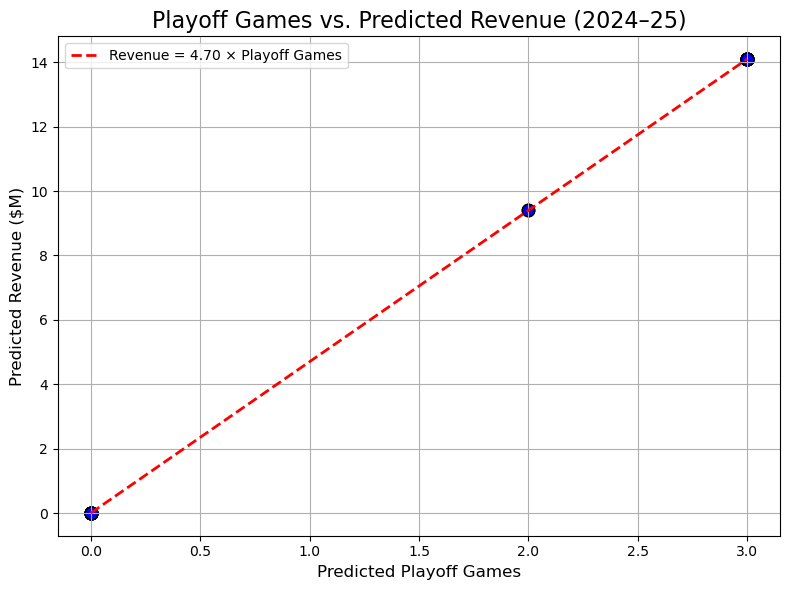

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your predictions (use 2024-2025 predictions here)
df = pd.read_csv("2024_2025_predictions.csv")

# Apply your revenue formula: Predicted Revenue = 4.70 × Playoff Games
df["predicted_revenue_millions"] = 4.7 * df["playoff_games"]

# Scatter plot of playoff games vs revenue
plt.figure(figsize=(8,6))
plt.scatter(df["playoff_games"], df["predicted_revenue_millions"], color="blue", edgecolor="k", s=80)

# Regression line (manual because it's a known equation)
x_vals = np.linspace(df["playoff_games"].min(), df["playoff_games"].max(), 100)
y_vals = 4.7 * x_vals
plt.plot(x_vals, y_vals, color="red", linestyle="--", linewidth=2, label="Revenue = 4.70 × Playoff Games")

# Highlight Toronto and Winnipeg
highlight_teams = ["Toronto Maple Leafs", "Winnipeg Jets"]
for idx, row in df.iterrows():
    if row["team"] in highlight_teams:
        plt.scatter(row["playoff_games"], row["predicted_revenue_millions"], color="green", edgecolor="k", s=100)
        plt.text(row["playoff_games"] + 0.2, row["predicted_revenue_millions"], row["team"], fontsize=9, fontweight='bold')

plt.xlabel("Predicted Playoff Games", fontsize=12)
plt.ylabel("Predicted Revenue ($M)", fontsize=12)
plt.title("Playoff Games vs. Predicted Revenue (2024–25)", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
